In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('Titanic/train.csv')
test = pd.read_csv('Titanic/test.csv')

## Data Description

There are 891 entries in the train data set, and 418 entries in the test data set.
PassengerId does not contain any information, therefore it should be removed.

Out of 10 features,3 are categorical.
1. Pclass-ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
2. Sex - female/male
3. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

4 are numerical
1. Age
2. Sibsp
3. Parch
4. Fare

3 should be further processed
1. Name
2. Cabin
3. Ticket

Looking at missing values, it is evident that cabin field only contain 1/4 of data in both test and train sets, therefore it should be removed as well.


In [5]:
print(f'size of the train set :',train.shape)
print(f'size of the test set :',test.shape)

size of the train set : (891, 12)
size of the test set : (418, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Single Variable Analysis

### Categorical Variables

In [49]:
train_pclass = train.groupby(['Pclass','Survived']).size().reset_index(name = 'Count')
train_pclass['Pclass%'] = 100* train_pclass['Count']/train_pclass.groupby(['Pclass'])['Count'].transform('sum')

In [50]:
train_pclass

,Pclass,Survived,Count,Pclass%
0,1,0,80,37.037037
1,1,1,136,62.962963
2,2,0,97,52.717391
3,2,1,87,47.282609
4,3,0,372,75.763747
5,3,1,119,24.236253


<AxesSubplot: xlabel='Embarked', ylabel='Embarked%'>

<Figure size 1800x400 with 0 Axes>

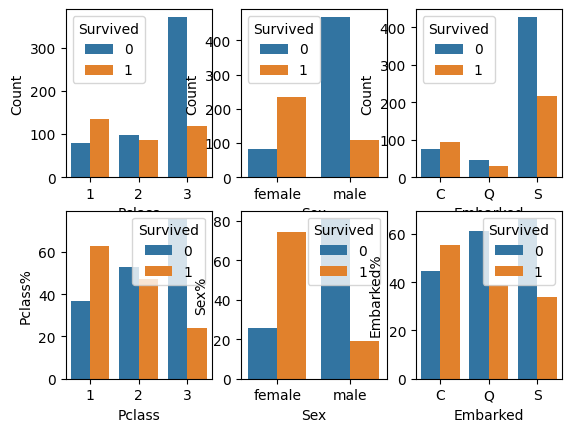

In [54]:
# creating the bar plot
#define dimensions of subplots (rows, columns)
plt.figure(figsize=(18,4))
fig, axes = plt.subplots(2, 3)

#create chart in each subplot
train_pclass = train.groupby(['Pclass','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_pclass, x = 'Pclass', y= 'Count', hue = 'Survived', ax=axes[0,0])
train_pclass['Pclass%'] = 100* train_pclass['Count']/train_pclass.groupby(['Pclass'])['Count'].transform('sum')
sns.barplot(data = train_pclass, x = 'Pclass', y= 'Pclass%', hue = 'Survived', ax=axes[1,0])

#create chart in each subplot
train_sex = train.groupby(['Sex','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_sex, x = 'Sex', y= 'Count', hue = 'Survived', ax=axes[0,1])
train_sex['Sex%'] = 100* train_sex['Count']/train_sex.groupby(['Sex'])['Count'].transform('sum')
sns.barplot(data = train_sex, x = 'Sex', y= 'Sex%', hue = 'Survived', ax=axes[1,1])

#create chart in each subplot
train_embarked = train.groupby(['Embarked','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_embarked, x = 'Embarked', y= 'Count', hue = 'Survived', ax=axes[0,2])
train_embarked['Embarked%'] = 100* train_embarked['Count']/train_embarked.groupby(['Embarked'])['Count'].transform('sum')
sns.barplot(data = train_embarked, x = 'Embarked', y= 'Embarked%', hue = 'Survived', ax=axes[1,2])

### Numerical Variables

https://www.youtube.com/watch?v=DCgPRaIDYXA

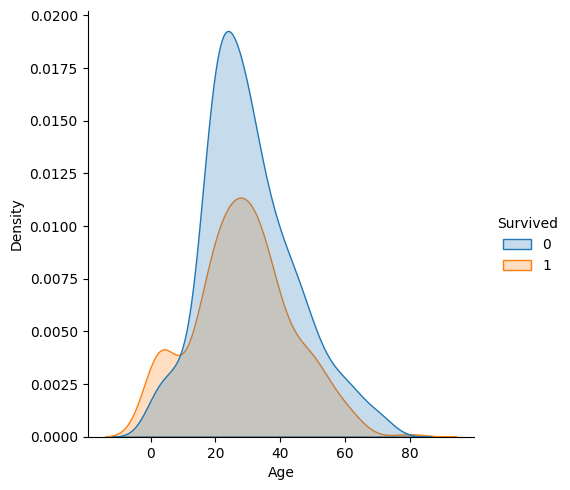

In [40]:
sns.displot(train, x='Age', hue='Survived', kind='kde', fill=True)

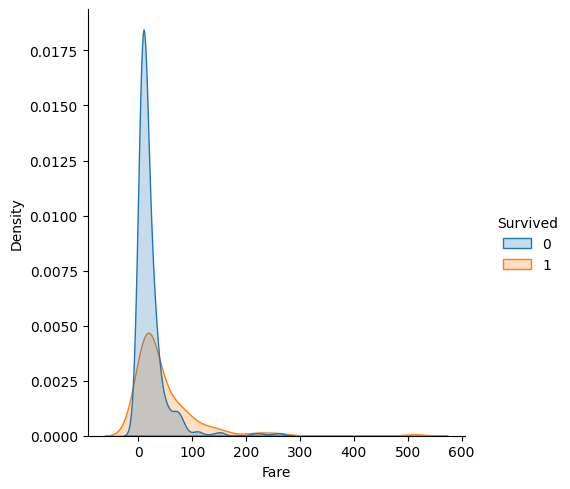

In [41]:
sns.displot(train, x='Fare', hue='Survived', kind='kde', fill=True)

<AxesSubplot: xlabel='Parch', ylabel='Parch%'>

<Figure size 1800x400 with 0 Axes>

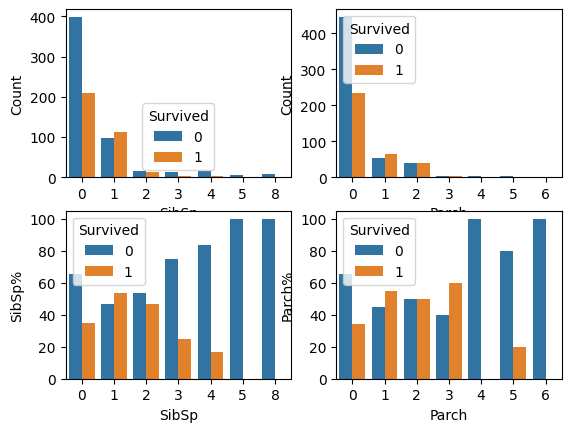

In [55]:
# creating the bar plot
#define dimensions of subplots (rows, columns)
plt.figure(figsize=(18,4))
fig, axes = plt.subplots(2, 2)

#create chart in each subplot
train_SibSp = train.groupby(['SibSp','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_SibSp, x = 'SibSp', y= 'Count', hue = 'Survived', ax=axes[0,0])
train_SibSp['SibSp%'] = 100* train_SibSp['Count']/train_SibSp.groupby(['SibSp'])['Count'].transform('sum')
sns.barplot(data = train_SibSp, x = 'SibSp', y= 'SibSp%', hue = 'Survived', ax=axes[1,0])

#create chart in each subplot
train_parch = train.groupby(['Parch','Survived']).size().reset_index(name = 'Count')
sns.barplot(data = train_parch, x = 'Parch', y= 'Count', hue = 'Survived', ax=axes[0,1])
train_parch['Parch%'] = 100* train_parch['Count']/train_parch.groupby(['Parch'])['Count'].transform('sum')
sns.barplot(data = train_parch, x = 'Parch', y= 'Parch%', hue = 'Survived', ax=axes[1,1])

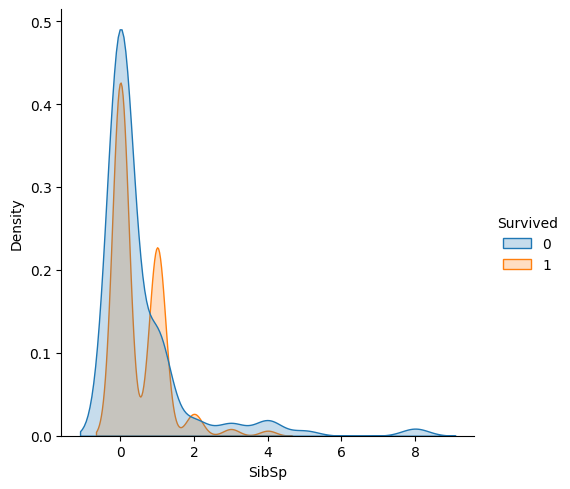

In [60]:
sns.displot(train, x='SibSp', hue='Survived', kind='kde', fill=True)

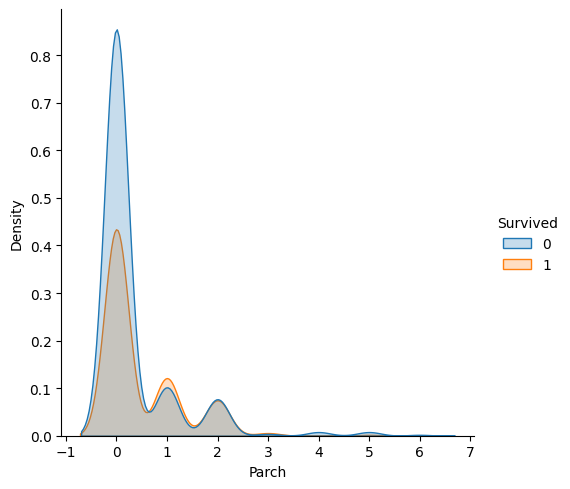

In [61]:
sns.displot(train, x='Parch', hue='Survived', kind='kde', fill=True)

In [ ]:
#Parch is not usable
#SibSp might cause overfit
